In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_9_simulation.ipynb")

# Iterative systems part II 

This lab has the following parts:
 - Combine your functions from lecture activity to simulate a skier going down an inclined slope (add starting and stopping points)
 - Extend that code to handle a "slope" made out of a quadratic polynomial
 - Some math to make a line or quadratic that starts at a given point with a given slope (will be used in homework to buid a slope out of polynomial pieces)

Slides
https://docs.google.com/presentation/d/1jDIVbp7EkyqVJJCpXnkg9KQl6stHF9WohauL1Lnr3YM/edit?usp=sharing


In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial

# Start at the top, slide to the bottom

TODO: Use the code from the lecture activity to simulate a skier sliding down a slope

Given:

- slope in the form of a linear equation **a0 + a1 x = y**
- a starting **x** value
- distance to travel in **x**

Assumes the skier starts at the top of the hill with zero velocity

You'll need to make the following changes to your simulate routine

- Calculate an initial start position based on the linear equation (start on the slope)

- Stop after traveling the given distance

- Return the final velocity as well as the poses


In [3]:
# This is makes this slightly safer than defining a variable 
def gravity():
    return -9.8

In [4]:
# TODO: Copy your compute_acceleration function here
def compute_acceleration(a0, a1):
    """TODO Compute the acceleration of a mass = 1 frictionless box on a line y = a0 + a1 x, assuming gravity of -9.8
    @return ax, ay - 2d vector for the acceleration"""
    
    g = [0, gravity()]

    magnitude = np.sqrt(1 + a1**2)
    incline_vector = [1/magnitude, a1/magnitude]
    
    g_dot_incline = np.dot(g, incline_vector)

    ax = incline_vector[0] * g_dot_incline
    ay = incline_vector[1] * g_dot_incline

    return ax, ay

In [5]:
# TODO Copy your simulate one step function here
def simulate_one_step(x, y, vx, vy, ax, ay, delta_t):
    """ TODO simulate one step forward using Euler integration 
       (x1 = x0 + delta_t * v0),
       (v1 = v0 + delta_t * a0)
       @param x, y - position
       @param vx, vy - velocity
       @param ax, ay - acceleration
       @return x_next, y_next, vx_next, vy_next"""
    x_next = x + delta_t * vx
    y_next = y + delta_t * vy

    vx_next = vx + delta_t * ax
    vy_next = vy + delta_t *ay

    return x_next, y_next, vx_next, vy_next

In [6]:
# TODO Copy your simulate n time steps function here
#    Check that everything works (step 1 below) BEFORE editing this to stop after x_travel
# Step 2: 
#   Most obvious change is to change the for loop to a while loop; be careful that you are
#     checking total distance traveled in x - reminder that you might be moving right OR left
# You'll need to change how you store the positions; easiest to make a list and use append then
#   convert to a numpy array at the end, after the while loop (don't forget to transpose it so it is 2xn)
# You'll also want to return the final velocity.
def simulate_unitl_x_travel(x, y, vx, vy, ax, ay, x_final, delta_t=0.1):
    """ Call simulate_one_step multiple times and store it in a numpy array
    @param starting_state - the starting position, velocity, acceleration
    @param delta_t - the time step to use. Define a default t value that you've determined works well
    @param n_time_steps - how many time steps to take. Again, default to a reasonable number
    @return position values as a 2xtimesteps numpy array
    """
    distance_traveled = 0.0
    prev_x = x

    positions = [(x, y)]

    while abs(distance_traveled) < abs(x_final):
        x, y, vx, vy = simulate_one_step(x, y, vx, vy, ax, ay, delta_t)
        positions.append((x, y))

        distance_traveled += x - prev_x
        prev_x = x
    
    positions_arr = np.array(positions).T

    return positions_arr, vx, vy #transpose to return expected shape



In [7]:
def simulate_linear(x_start, x_travel, poly, delta_t):
    """Run the simulation with the given start location and polyline
    @param x_start - the starting x location. 
    @param x_travel - after traveled x_travel distance, stop
    @param poly - tuple/list for the polynomial. a0 = poly[0], a1 = poly[1]
    @param delta_t - time step
    @return positions as a 2xn numpy array and final velocity as a tuple"""
    # TODO
    #  Step 1: Calculate the y value for the start position and the acceleration from the poly
    #     Call simulate with 100 time steps
    #     Return the poses, return 0,0 as the velocity
    #  Step 2: Now change your simulate function so that it stops when the skier has traveled x_travel distance
    #     Edit to also return the ending velocity
    a0, a1 = poly
    
    y_start = a0 + a1 * x_start

    vx = 0.0
    vy = 0.0

    ax, ay = compute_acceleration(a0, a1)

    positions, vx_final, vy_final = simulate_unitl_x_travel(x_start, y_start, vx, vy, ax, ay, x_travel, delta_t)

    return positions, (vx_final, vy_final)

In [8]:
# Time step
delta_t = 0.01

# Actually run the simulation
# Time step
delta_t = 0.1
x_start = 1.0
x_travel = 2.0
poly = (1, 0.5)

ret_poses, final_v = simulate_linear(x_start=x_start, x_travel=x_travel, poly=poly, delta_t=delta_t)

# These will be true in Step 1 and Step 2 (starting position)
assert np.isclose(ret_poses[0, 0], x_start)
assert np.isclose(ret_poses[1, 0], polynomial.polyval(x_start, np.array(poly)))
assert ret_poses[1, 0] > ret_poses[1, -1]

# After you've copied over your simulate code, but before you've fixed it (after step 1 but before step 2) these are the expected values
x_end_100_time_steps = -189.152
print(f"Step 1: expected last pose to be {x_end_100_time_steps}, {polynomial.polyval(x_end_100_time_steps, np.array(poly))}, was {ret_poses[:, -1]} ")

# This one will be true if the last pose is past the x_travel
x_end_x_travel = -1.156
print(f"Step 2: expected last pose to be {x_end_x_travel}, {polynomial.polyval(x_end_x_travel, np.array(poly))}, was {ret_poses[:, -1]} ")
print(f"Step 2: expected final velocity to be (-4.312, -2.156), was {final_v}")


Step 1: expected last pose to be -189.152, -93.576, was [-1.156  0.422] 
Step 2: expected last pose to be -1.156, 0.42200000000000004, was [-1.156  0.422] 
Step 2: expected final velocity to be (-4.312, -2.156), was (np.float64(-4.311999999999999), np.float64(-2.1559999999999997))


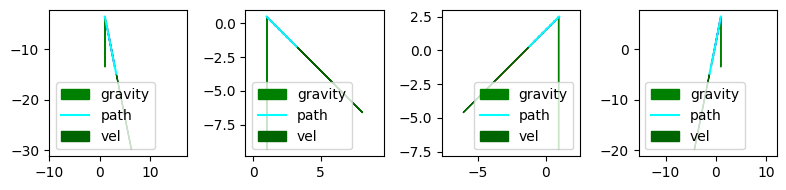

In [9]:
# This is for visualization purposes; it shows the lines (in black) with
#  your calculated acceleration vectors in red and gravity in green and returned poses in cyan
# Feel free to edit
# Note that your acceleration vectors should lie on top of the lines and point down
fig, axs = plt.subplots(1, 4, figsize=(8, 2))

# Note: Not doing flat bit because, well, the skier would not go anywhere...
for ind, (a1, x_limit) in enumerate(zip((-5, -1, 1, 5),(0.2, 5, 5, 0.2))):
    # Plot line
    if ind < 2:
        xs = np.linspace(x_start, x_start + x_travel)
    else:
        xs = np.linspace(x_start, x_start - x_travel)
    
    # Set the y intercept to 1.5
    poly_plot = (1.5, a1)
    ys = polynomial.polyval(xs, np.array(poly_plot))

    axs[ind].plot(xs, ys, ':b')
    axs[ind].axis('equal')

    f_x, f_y = compute_acceleration(a0=poly_plot[0], a1=poly_plot[1])
    axs[ind].arrow(xs[1], ys[1], f_x, f_y, color='red')

    axs[ind].arrow(xs[1], ys[1], 0.0, gravity(), color='green', label="gravity")

    ret_poses_plot, final_v_plot = simulate_linear(x_start=x_start, x_travel=x_travel, poly=poly_plot, delta_t=delta_t)    

    axs[ind].plot(ret_poses_plot[0, :], ret_poses_plot[1, :], color='cyan', label='path')
    axs[ind].arrow(ret_poses_plot[0, -1], ret_poses_plot[1, -1], final_v_plot[0], final_v_plot[1], color='darkgreen', label="vel")
    if np.abs(final_v_plot[0]) > 0:
        axs[ind].legend()
fig.tight_layout()


In [10]:
grader.check("slide_down_slope")

slide_down_slope results: All test cases passed!

# Slide down a quadratic slope

TODO: Change from a linear slope to a quadratic one
 - calculate the acceleration for a quadratic function (use the tangent as the current linear slope)
 - calculate a new acceleration at every time step (based on the tanget at that point)
 
One other thing we'll see here is that the tangent approximation is not "perfect" - the skier will end up off of the slope if you simulate long enough.

In [11]:
# TODO: Assuming you wrote the original compute acceleration by calculating the theta of the slope of the line
#   then the modification looks like:
# Calculate the derivative of the polynomial at the given point
# Use that to get the slope angle theta
# Do the same code you had before to compute the acceleration
#  NOTE: This should still work for a linear polynomial... you might find polynomial.polyder useful here

def compute_quad_acceleration(x, poly):
    """TODO Compute the acceleration of a mass = 1 frictionless box on a polynomial, assuming gravity of -9.8
    @param x - the current x value for the polynomial
    @param poly - the polynomial in the form a0 + a1 x + a2 x^2... = y
    @return ax, ay - 2d vector for the acceleration"""
    d_poly = polynomial.polyder(poly)

    slope = polynomial.polyval(x, d_poly)

    theta = np.arctan(slope)

    slope_mag = np.sqrt(1 + slope**2)
    incline_vector = [1/slope_mag, slope / slope_mag]

    g = [0, gravity()]
    g_dot_incline = np.dot(g, incline_vector)

    ax = incline_vector[0] * g_dot_incline
    ay = incline_vector[1] * g_dot_incline

    return ax, ay

In [12]:
# Testing your function
poly_check = np.array((1.0, 0.5, 3.0))
xs_check = (-1, 0, 1)

f_check_res = ((1.7247999999999992, -9.4864), (-3.92, -1.96), (-1.472832369942196, -9.573410404624278))
for ind, x_check in enumerate(xs_check):    
    f_x_check, f_y_check = compute_quad_acceleration(x=x_check, poly=poly_check)
    print(f"Expected {f_check_res[ind]}, got ({f_x_check}, {f_y_check})")

Expected (1.7247999999999992, -9.4864), got (1.7248, -9.4864)
Expected (-3.92, -1.96), got (-3.92, -1.96)
Expected (-1.472832369942196, -9.573410404624278), got (-1.4728323699421966, -9.573410404624278)


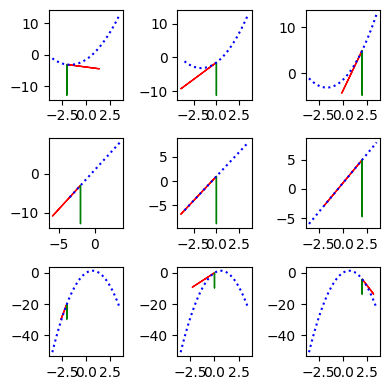

In [13]:
# This is for visualization purposes; it shows the polynomial (in black) with
#  your calculated acceleration vectors in red 
# Feel free to edit
# Note that your acceleration vectors should parallel to the curve and point down
fig, axs = plt.subplots(3, 3, figsize=(4, 4))

# Note: Sampling 3 points along the quadratic, one of which is actually a line...
polys_plot = (((-1.5, 2.0, 0.6)), (1.0, 2.0, 0.0), (0.0, 4.0, -3.0))
for ir, poly_plot in enumerate(polys_plot):
    for ic, x_try in enumerate((-2.0, 0.0, 2.0)):
        # Plot line
        xs = np.linspace(-3.5, 3.5)
        ys = polynomial.polyval(xs, poly_plot)

        # The quadratic
        axs[ir, ic].plot(xs, ys, ':b')
        #axs[ir, ic].axis('equal')

        f_x, f_y = compute_quad_acceleration(x=x_try, poly=poly_plot)
        y_plot = polynomial.polyval(x_try, poly_plot)
        axs[ir, ic].arrow(x_try, y_plot, f_x, f_y, color='red')

        axs[ir, ic].arrow(x_try, y_plot, 0.0, gravity(), color='green', label="gravity")
fig.tight_layout()


In [14]:
grader.check("quadratic_slope")

quadratic_slope results: All test cases passed!

# Part 2b: Simulate the skier on a quadratic slope

TODO: Very similar to the linear example, except now calculating the slope at every point

In [15]:
# TODO: copy the body of your linear simulate code here (but use the name sinulate_quad)
#  First you should change it so that the acceleration is calculated at every time step from the current location
#   (and call compute_quad_acceleration instead of compute_acceleration)
#  What goes wrong: the skier can "pass through" the slope (see picture in slides). To fix this,
#   if the skier goes under the polynomial curve, just put it back on the curve
def simulate_quad(x_start, x_travel, poly, delta_t):
    """Run the simulation with the given start location and polyline
    @param x_start - the starting x location. 
    @param x_travel - after traveled x_travel distance, stop
    @param poly - tuple/list for the polynomial. a0 = poly[0], a1 = poly[1]
    @param delta_t - time step
    @return positions as a 2xn numpy array and final velocity as a tuple"""
    
    x = x_start
    y = polynomial.polyval(x, poly)
    prev_x = x
    
    vx = 0.0
    vy = 0.0
    distance_traveled = 0.0

    positions = [(x, y)]

    while abs(distance_traveled) < abs(x_travel):
        ax, ay = compute_quad_acceleration(x, poly)
        x, y, vx, vy = simulate_one_step(x, y, vx, vy, ax, ay, delta_t)

        y_surface = polynomial.polyval(x, poly)
        if y < y_surface:
            y = y_surface

        positions.append((x, y))

        distance_traveled += x - prev_x
        prev_x = x

     
    positions_arr = np.array(positions).T

    return positions_arr, (vx, vy)
    


In [16]:
# Checks
poly_check2 = np.array((-1.5, 2.0, 0.6))
x_start_check2 = 0.0
x_travel_check2 = 3.0
x_end_check2 = x_start_check2 - x_travel_check2

f_check_res = ((1.7247999999999992, -9.4864), (-3.92, -1.96), (-1.472832369942196, -9.573410404624278))
ret_poses_check_quad, vel_quad = simulate_quad(x_start=x_start_check2, x_travel=x_travel_check2, poly=poly_check2, delta_t=delta_t)

assert np.isclose(ret_poses_check_quad[0, 0], x_start_check2) 
assert np.isclose(ret_poses_check_quad[1, 0], polynomial.polyval(x_start_check2, poly_check2)) 

assert np.isclose(ret_poses_check_quad[0, -1], x_end_check2, atol=0.1) 
assert np.isclose(ret_poses_check_quad[1, -1], polynomial.polyval(x_end_check2, poly_check2), atol=0.1) 

vel_quad_check = (-2.91059892, -6.91631447)
assert np.isclose(vel_quad[0], vel_quad_check[0], atol=0.1) 
assert np.isclose(vel_quad[1], vel_quad_check[1], atol=0.1) 


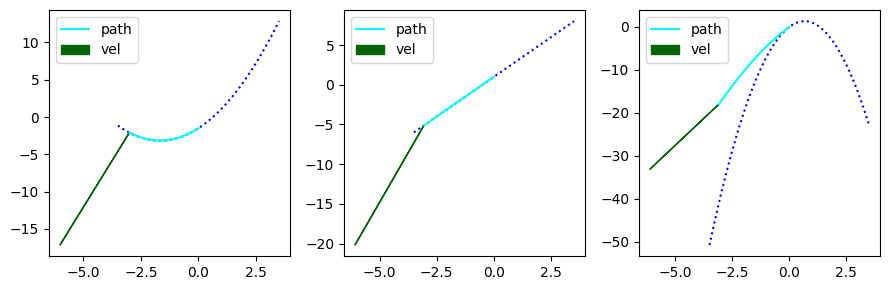

In [17]:
# This is for visualization purposes; it shows the polynomial (in black) with
#  your calculated poses in blue with final velocity in dark green
# Feel free to edit
# Note that your acceleration vectors should parallel to the curve and point down
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Note: Sampling 3 points along the quadratic, one of which is actually a line...
polys_plot = (((-1.5, 2.0, 0.6)), (1.0, 2.0, 0.0), (0.0, 4.0, -3.0))
for ind, poly_plot in enumerate(polys_plot):
    # Plot line
    xs = np.linspace(-3.5, 3.5)
    ys = polynomial.polyval(xs, poly_plot)

    # The quadratic
    axs[ind].plot(xs, ys, ':b')
    #axs[ind].axis('equal')

    ret_poses_plot, vel_plot = simulate_quad(x_start=0.0, x_travel=3.0, poly=poly_plot, delta_t=delta_t)
    axs[ind].plot(ret_poses_plot[0, :], ret_poses_plot[1, :], color='cyan', label='path')
    axs[ind].arrow(ret_poses_plot[0, -1], ret_poses_plot[1, -1], final_v_plot[0], final_v_plot[1], color='darkgreen', label="vel")
    axs[ind].legend()
fig.tight_layout()


In [18]:
grader.check("simulate quadratic")

simulate quadratic results: All test cases passed!

## Make geometry for slope

This is in preperation for "building" a slope from a sequence of linear and quadratic polynomials (see homework). 

To string the slopes together, you need the end of the first segment to match the start of the next segment. For lines, this means there's only one degree of freedom, which we'll make be the slope (a1). This leads to two equations:

Let x_end_prev, y_end_prev be the end of the previous line segment, and line_slope be the desired line slope:

**a0 + a1 x_end_prev = y_end_prev**

**a1 = line_slope**

For quadratics, we need an additional constraint (because there are 3 unknowns); there's no "right" answer for this, but for this problem we'll make the third constraint be that the curve has to end at x_end, y_end. This leads to three equations

**a0 + a1 x_end_prev + a2 x_end_prev = y_end_prev**

**a1 + 2 a2 x_end_prev = line_slope**

**a0 + a1 x_end + a2 x_end = y_end**



In [19]:
# TODO create a linear polynomial that starts at the given start point and has the given slope
def solve_linear_polynomial(x_start, y_start, line_slope):
    """ Return a0 + a1 x = y (see instructions at the start of this question)
    @param x_start - x location to start the line at
    @param y_start - make a0 + a1 x_start = y_start
    @param line_slope - slope of the line (a1) 
    @return a0, a1 as a numpy array (for np.polynomial)"""
    a1 = line_slope
    a0 = y_start - a1 * x_start
    return np.array([a0, a1])

In [20]:
x_start_c1 = 2.0
y_start_c1 = 3.0
line_slope_c1 = 1.0

poly_c1 = solve_linear_polynomial(x_start=x_start_c1, y_start=y_start_c1, line_slope=line_slope_c1)

assert np.isclose(y_start_c1, polynomial.polyval(x_start_c1, poly_c1), atol=0.001)
assert np.isclose(line_slope_c1, poly_c1[1], atol=0.001)

In [21]:
# TODO create a quadratic polynomial that starts at the given start point and has the given slope and ends at the given point
def solve_quad_polynomial(x_start, y_start, x_end, y_end, join_slope):
    """ Return a0 + a1 x + a2 x^2 = y (see instructions at the start of this equation)
    @param x_start - x location to start the line at
    @param y_start - make a0 + a1 x_start + a2 x_start^2 = y_start
    @param x_end - x location at end of quadratic
    @param y_end - make a0 + a1 x_end + a2 x_end^2 = y_end
    @param join_slope - slope of the quadratic at x_start
    @return a0, a1, a2 as a numpy array (for np.polynomial)"""
    A = A = np.array([
        [1, x_start, x_start**2],
        [1, x_end, x_end**2],
        [0, 1, 2 * x_start]])

    b = np.array([y_start, y_end, join_slope])

    return np.linalg.solve(A,b)

In [22]:
x_start_c2 = -1.0
y_start_c2 = 3.0
x_end_c2 = 2.0
y_end_c2 = 2.0
line_slope_c2 = 1.0

poly_c2 = solve_quad_polynomial(x_start=x_start_c2, y_start=y_start_c2, x_end=x_end_c2, y_end=y_end_c2, join_slope=line_slope_c2)


assert np.isclose(y_start_c2, polynomial.polyval(x_start_c2, poly_c2), atol=0.001)
assert np.isclose(y_end_c2, polynomial.polyval(x_end_c2, poly_c2), atol=0.001)
poly_der_c2 = polynomial.polyder(poly_c2)
assert np.isclose(line_slope_c2, polynomial.polyval(x_start_c2, poly_der_c2), atol=0.001)

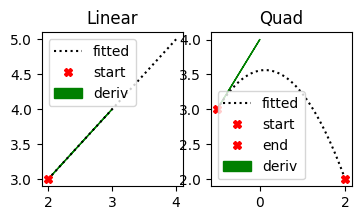

In [23]:
# Plotting the polynomials with the constraints
fig, axs = plt.subplots(1, 2, figsize=(4, 2))

xs_plot = np.linspace(x_start_c1, x_start_c1 + 2.0)
ys_plot = polynomial.polyval(xs_plot, poly_c1)
axs[0].plot(xs_plot, ys_plot, ':k', label='fitted')

axs[0].plot(x_start_c1, y_start_c1, 'Xr', label='start')
axs[0].arrow(x_start_c1, y_start_c1, 1.0, line_slope_c1, color='Green', label='deriv')
axs[0].set_title("Linear")
axs[0].legend()

xs_plot = np.linspace(x_start_c2, x_end_c2)
ys_plot = polynomial.polyval(xs_plot, poly_c2)
axs[1].plot(xs_plot, ys_plot, ':k', label='fitted')

axs[1].plot(x_start_c2, y_start_c2, 'Xr', label='start')
axs[1].plot(x_end_c2, y_end_c2, 'Xr', label='end')
axs[1].arrow(x_start_c2, y_start_c2, 1.0, line_slope_c2, color='Green', label='deriv')
axs[1].set_title("Quad")
axs[1].legend()


In [24]:
grader.check("geometry")

geometry results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [25]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS 2S5 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 2

In [26]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Double check your plots. 

- Submit this .ipynb file  to lab 9 (simulation)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Failures: If you imported any files, make sure you submit them as well